# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

# Print country code to confirm it matches amount of cities
print(len(countries))


606
606


In [3]:
# Dataframe to store data
WeatherDF = pd.DataFrame({'City': cities,
                          'Country': countries,
                          'Lat': "",
                          'Lng': "",
                          'Max Temp': "",
                          'Humidity': "",
                          'Cloudiness': "",
                          'Wind Speed': "",
                          'Date': ""
                         })
WeatherDF.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,los llanos de aridane,ES,,,,,,,
1,manado,ID,,,,,,,
2,samarinda,ID,,,,,,,
3,vaini,TO,,,,,,,
4,maldonado,UY,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Keep track of response number
RecordNum = 1
RecordSet = 1

# Base URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

#Run the API for each city
print('''
______________________________
Beginning Data Retrieval
______________________________''')

# Loop through cities in API and add to dataframe
for index, row in WeatherDF.iterrows():
    # Query URL for API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&units=imperial'+'&APPID=' + weather_api_key
    # API Call
    response = requests.get(query_url).json()

    # Exception script if city is not found and adding info to data frame if it is
    try:
        # Message that computer is looking for data
        print(f'Processing Weather Data for Record {RecordNum} of Set {RecordSet} | {response["name"]}')
        
        # Input data into DataFrame
        WeatherDF.loc[index, 'Cloudiness'] = response['clouds']['all']
        WeatherDF.loc[index, 'Date'] = response['dt']
        WeatherDF.loc[index, 'Humidity'] = response['main']['humidity']
        WeatherDF.loc[index, 'Lat'] = response['coord']['lat']
        WeatherDF.loc[index, 'Lng'] = response['coord']['lon']
        WeatherDF.loc[index, 'Max Temp'] = response['main']['temp_max']
        WeatherDF.loc[index, 'Wind Speed'] = response['wind']['speed']
        
        # Increase the record count
        RecordNum += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
        
    # If statement to handle API call limits
    if RecordNum == 51:
        RecordSet += 1
        RecordNum = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


______________________________
Beginning Data Retrieval
______________________________
Processing Weather Data for Record 1 of Set 1 | Los Llanos de Aridane
Processing Weather Data for Record 2 of Set 1 | Manado
Processing Weather Data for Record 3 of Set 1 | Samarinda
Processing Weather Data for Record 4 of Set 1 | Vaini
Processing Weather Data for Record 5 of Set 1 | Departamento de Maldonado
City not found....Skipping............
Processing Weather Data for Record 6 of Set 1 | Saint Paul Harbor
Processing Weather Data for Record 7 of Set 1 | Bluff
Processing Weather Data for Record 8 of Set 1 | Rikitea
Processing Weather Data for Record 9 of Set 1 | Oodweyne
Processing Weather Data for Record 10 of Set 1 | Khatanga
Processing Weather Data for Record 11 of Set 1 | Hamilton
Processing Weather Data for Record 12 of Set 1 | Kapaa
Processing Weather Data for Record 13 of Set 1 | Qaanaaq
Processing Weather Data for Record 14 of Set 1 | Bernalillo
Processing Weather Data for Record 15 of 

Processing Weather Data for Record 28 of Set 3 | Burgeo
Processing Weather Data for Record 29 of Set 3 | Moa
Processing Weather Data for Record 30 of Set 3 | Carnarvon
Processing Weather Data for Record 31 of Set 3 | Mountain Home
Processing Weather Data for Record 32 of Set 3 | Cairns
Processing Weather Data for Record 33 of Set 3 | Guerrero Negro
City not found....Skipping............
Processing Weather Data for Record 34 of Set 3 | Yichang
Processing Weather Data for Record 35 of Set 3 | Arraial do Cabo
Processing Weather Data for Record 36 of Set 3 | Lompoc
Processing Weather Data for Record 37 of Set 3 | Cayenne
Processing Weather Data for Record 38 of Set 3 | Rāver
Processing Weather Data for Record 39 of Set 3 | Nemuro
Processing Weather Data for Record 40 of Set 3 | Bambanglipuro
Processing Weather Data for Record 41 of Set 3 | Singaraja
Processing Weather Data for Record 42 of Set 3 | Torbay
City not found....Skipping............
City not found....Skipping............
Processi

Processing Weather Data for Record 9 of Set 6 | Sibolga
Processing Weather Data for Record 10 of Set 6 | Sinnamary
Processing Weather Data for Record 11 of Set 6 | Hervey Bay
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 12 of Set 6 | Atasū
Processing Weather Data for Record 13 of Set 6 | Port Lincoln
City not found....Skipping............
Processing Weather Data for Record 14 of Set 6 | Barsovo
Processing Weather Data for Record 15 of Set 6 | Arrondissement de Moulins
Processing Weather Data for Record 16 of Set 6 | Waseca
Processing Weather Data for Record 17 of Set 6 | Orhei
City not found....Skipping............
Processing Weather Data for Record 18 of Set 6 | Porbandar
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 19 of Set 6 | Townsville
Processing Weather Data for Record 20 of Set 6 | Nouadhibou
Processing Weather Data for Record 21 of Set 6 | Gam

Processing Weather Data for Record 35 of Set 8 | Korla
City not found....Skipping............
Processing Weather Data for Record 36 of Set 8 | Sergeevka
Processing Weather Data for Record 37 of Set 8 | Ust-Maya
Processing Weather Data for Record 38 of Set 8 | Baruun-Urt
City not found....Skipping............
Processing Weather Data for Record 39 of Set 8 | Brandon
City not found....Skipping............
Processing Weather Data for Record 40 of Set 8 | Kangaatsiaq
Processing Weather Data for Record 41 of Set 8 | Oakdale
Processing Weather Data for Record 42 of Set 8 | Bauchi
Processing Weather Data for Record 43 of Set 8 | Iberia
Processing Weather Data for Record 44 of Set 8 | Chapleau
Processing Weather Data for Record 45 of Set 8 | Arrondissement de Morlaix
Processing Weather Data for Record 46 of Set 8 | Siaya
Processing Weather Data for Record 47 of Set 8 | Nyurba
Processing Weather Data for Record 48 of Set 8 | Qui Nhon
Processing Weather Data for Record 49 of Set 8 | Naze
Processi

Processing Weather Data for Record 12 of Set 11 | Manadhoo
Processing Weather Data for Record 13 of Set 11 | Anloga
Processing Weather Data for Record 14 of Set 11 | Sistranda
Processing Weather Data for Record 15 of Set 11 | Moberly
Processing Weather Data for Record 16 of Set 11 | Flinders
Processing Weather Data for Record 17 of Set 11 | Kamenka
Processing Weather Data for Record 18 of Set 11 | Salisbury
Processing Weather Data for Record 19 of Set 11 | Pundaguitan
Processing Weather Data for Record 20 of Set 11 | Berlevåg
Processing Weather Data for Record 21 of Set 11 | Rio Verde de Mato Grosso
Processing Weather Data for Record 22 of Set 11 | Sabang
Processing Weather Data for Record 23 of Set 11 | El Fuerte
Processing Weather Data for Record 24 of Set 11 | San Ramón
Processing Weather Data for Record 25 of Set 11 | Comodoro Rivadavia
Processing Weather Data for Record 26 of Set 11 | Kenora
Processing Weather Data for Record 27 of Set 11 | Butajīra
Processing Weather Data for Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Drop rows with no info
WeatherDF.dropna()

print(WeatherDF.count())
# Save to csv
WeatherDF.to_csv("/Output/WeatherDF.csv")

# Preview the dataframe
WeatherDF.head()


City          606
Country       606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Date          606
dtype: int64


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,los llanos de aridane,ES,28.6585,-17.9182,66.2,59,0,3.44,1619659615
1,manado,ID,1.487,124.846,87.8,62,20,2.3,1619659497
2,samarinda,ID,-0.5,117.15,82.38,75,91,1.74,1619659473
3,vaini,TO,-21.2,-175.2,80.6,83,75,6.91,1619659616
4,maldonado,UY,-34.6667,-54.9167,55.99,100,0,4.61,1619659616


In [6]:
# Convert into Dataframe
WeatherDF = pd.DataFrame(WeatherDF)
print(WeatherDF.dtypes)

City          object
Country       object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Date          object
dtype: object


In [7]:
# Convert string to float
WeatherDF['Lat'] = pd.to_numeric(WeatherDF['Lat'], errors = 'coerce')
WeatherDF['Lng'] = pd.to_numeric(WeatherDF['Lng'], errors = 'coerce')
WeatherDF['Max Temp'] = pd.to_numeric(WeatherDF['Max Temp'], errors = 'coerce')
WeatherDF['Humidity'] = pd.to_numeric(WeatherDF['Humidity'], errors = 'coerce')
WeatherDF['Cloudiness'] = pd.to_numeric(WeatherDF['Cloudiness'], errors = 'coerce')
WeatherDF['Date'] = pd.to_numeric(WeatherDF['Date'], errors = 'coerce')
WeatherDF['Wind Speed'] = pd.to_numeric(WeatherDF['Wind Speed'], errors = 'coerce')

print(WeatherDF.dtypes)

City           object
Country        object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Date          float64
dtype: object


In [8]:
WeatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,5.310000e+02
mean,20.120366,17.607039,61.253992,71.028249,55.487759,6.985593,1.619660e+09
std,33.436010,91.983225,18.988559,22.052792,38.616222,4.806433,2.655598e+02
min,-54.800000,-179.166700,12.760000,8.000000,0.000000,0.020000,1.619659e+09
25%,-7.221700,-67.190850,45.760000,61.500000,18.000000,3.440000,1.619660e+09
50%,22.566700,20.971400,64.400000,75.000000,68.000000,6.020000,1.619660e+09
75%,48.616600,104.953850,77.000000,87.500000,93.500000,9.080000,1.619660e+09
max,78.218600,179.316700,93.000000,100.000000,100.000000,33.380000,1.619660e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


THERE ARE NO CITIES WITH HUMIDITY OVER 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

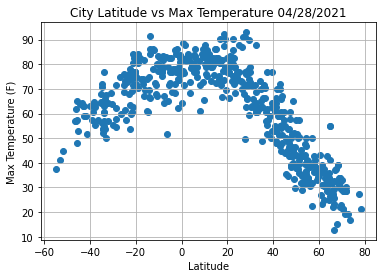

In [16]:
x = WeatherDF['Lat']
y = WeatherDF['Max Temp']
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature {time.strftime("%m/%d/%Y")}')
plt.grid(True)

# Print plot
plt.savefig("Output/Latitude_vs_Max_Temp.png")

# Analysis

As expected, we can see in this scatter plot that the weather gets warmer the closer the latitude is equal to zero (the closer you get to the equator.) It looks like the weather is nicest from -20 to 20 latitude and drops off out side of that range.

## Latitude vs. Humidity Plot

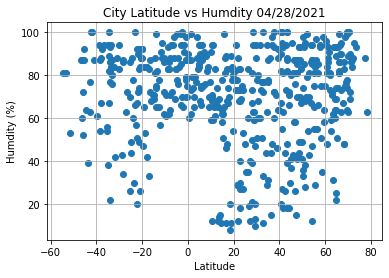

In [10]:
# Scatter plot of Latitude vs Humdity
x = WeatherDF['Lat']
y = WeatherDF['Humidity']
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel('Humdity (%)')
plt.title(f'City Latitude vs Humdity {time.strftime("%m/%d/%Y")}')
plt.grid(True)

# Print/save scatterplot
plt.savefig("Output/Latitude_vs_Humidity.png")

# Analysis

There is no relationship between Latitude and Humdity.

## Latitude vs. Cloudiness Plot

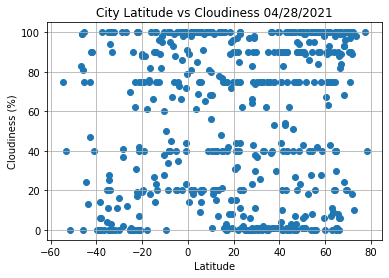

In [11]:
# Scatter Plot of Latitude vs Cloudiness
x = WeatherDF['Lat']
y = WeatherDF['Cloudiness']
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {time.strftime("%m/%d/%Y")}')
plt.grid(True)

# Print/save plot
plt.savefig("Output/Latitude_vs_Cloudiness.png")

# Analysis

There is no relationship between Latitude and Cloudiness

## Latitude vs. Wind Speed Plot

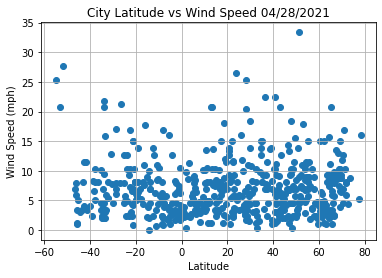

In [17]:
# Scatter plot of Latitude vs Wind Speed
x = WeatherDF['Lat']
y = WeatherDF['Wind Speed']
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.grid(True)

#Print plot
plt.savefig("Output/Latitude_vs_Wind_Speed.png")

# Analysis

There is no relationship between Latitude and Wind Speed.

## Linear Regression

In [18]:
# Add Southern/Northern Hemisphere dataframes
NorthernDF = WeatherDF.query(f"Lat >= 0")
SouthernDF = WeatherDF.query(f"Lat <= 0")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and Latitude for the Northern Hemisphere is -0.91


<function matplotlib.pyplot.show(close=None, block=None)>

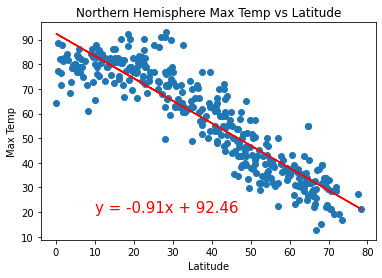

In [21]:
#Set Axis
x_axis = NorthernDF['Lat']
y_axis = NorthernDF['Max Temp']
# Pearson R
r = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Max Temp and Latitude for the Northern Hemisphere is {round(r[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere Max Temp vs Latitude')

# Show plot
plt.show

#Print plot
plt.savefig("Output/Northern_Latitude_vs_Max_Temp.png")

# Analysis

There is a very clear relationship between latitude and temperature! The higher the latitude, the lower the max temp.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [1]:
#Set Axis
x_axis = SouthernDF['Lat']
y_axis = SouthernDF['Max Temp']
# Pearson R
r = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Max Temp and Latitude for the Southern Hemisphere is {round(r[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere Max Temp vs Latitude')

# Show plot
plt.show

#Print plot
plt.savefig("Output/Southern_Latitude_vs_Max_Temp.png")

NameError: name 'SouthernDF' is not defined

# Analysis

There is still a relationship between the further you get from the equator then it is colder. However, the correlation is not as strong as the northern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity and Latitude for the Northern Hemisphere is 0.11


<function matplotlib.pyplot.show(close=None, block=None)>

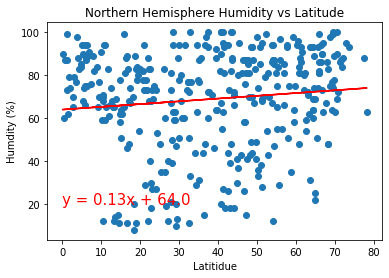

In [34]:
#Set Axis
x_axis = NorthernDF['Lat']
y_axis = NorthernDF['Humidity']
# Pearson R
r = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Humidity and Latitude for the Northern Hemisphere is {round(r[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitidue')
plt.ylabel('Humdity (%)')
plt.title('Northern Hemisphere Humidity vs Latitude')

# Show plot
plt.show

# Print plot
plt.savefig("Output/Northern_Latitude_vs_Humidity.png")

# Analysis

A very low Pearson's r number further indicates what we thought before about the correlation between humity and latitude; there isn't one.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity and Latitude for the Southern Hemisphere is 0.13


<function matplotlib.pyplot.show(close=None, block=None)>

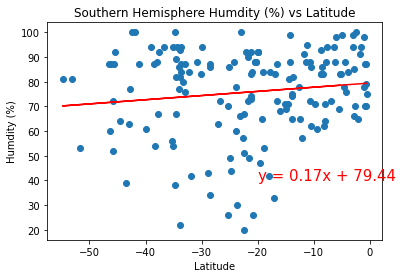

In [33]:
#Set Axis
x_axis = SouthernDF['Lat']
y_axis = SouthernDF['Humidity']
# Pearson R
r = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Humidity and Latitude for the Southern Hemisphere is {round(r[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humdity (%)')
plt.title('Southern Hemisphere Humdity (%) vs Latitude')

# Show plot
plt.show

#Print plot
plt.savefig("Output/Southern_Latitude_vs_Humidty.png")

# Analysis

Though the Pearson's r is slightly higher than in the Northern hemisphere, it is not high enough to think there is any kind of correlation between humity and latitude in the Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Humidity and Latitude for the Northern Hemisphere is 0.1


<function matplotlib.pyplot.show(close=None, block=None)>

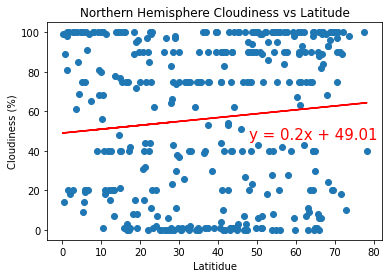

In [32]:
#Set Axis
x_axis = NorthernDF['Lat']
y_axis = NorthernDF['Cloudiness']
# Pearson R
r = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Cloudiness and Latitude for the Northern Hemisphere is {round(r[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(48,46),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitidue')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness vs Latitude')

# Show plot
plt.show

# Print plot
plt.savefig("Output/Northern_Latitude_vs_Cloudiness.png")

# Analysis

Dots all over the place! This plot confirms our other analysis that there is not relationship between cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness and Latitude for the Southern Hemisphere is 0.24


<function matplotlib.pyplot.show(close=None, block=None)>

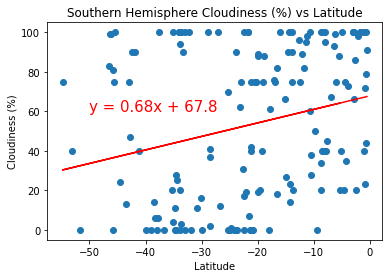

In [37]:
#Set Axis
x_axis = SouthernDF['Lat']
y_axis = SouthernDF['Cloudiness']
# Pearson R
r = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Cloudiness and Latitude for the Southern Hemisphere is {round(r[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
b
# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness (%) vs Latitude')

# Show plot
plt.show

# Print Plot
plt.savefig("Output/Southern_Latitude_vs_Cloudiness.png")

# Analysis

Though it appears that in the Southern Hemisphere it appears that there is slightly more correlation between Cloudiness and Latitude. However, it's not a strong enough correlation that one would state that they are actually correlated.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Set Axis
x_axis = NorthernDF['Lat']
y_axis = NorthernDF['Wind Speed']
# Pearson R
r = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Wind Speed (mph) and Latitude for the Northern Hemisphere is {round(r[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(48,46),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitidue')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed (mph) vs Latitude')

# Show plot
plt.show

# Print plot
plt.savefig("Output/Northern_Latitude_vs_Wind_Speeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed (mph) and Latitude for the Southern Hemisphere is -0.23


<function matplotlib.pyplot.show(close=None, block=None)>

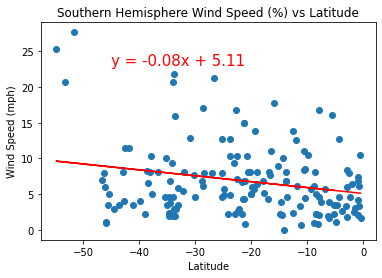

In [39]:
#Set Axis
x_axis = SouthernDF['Lat']
y_axis = SouthernDF['Wind Speed']
# Pearson R
r = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Wind Speed (mph) and Latitude for the Southern Hemisphere is {round(r[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-45,23),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed (%) vs Latitude')

# Show plot
plt.show

# Print plot
plt.savefig("Output/Southern_Latitude_vs_Wind_Speed.png")

# Analysis

There is no major correlation between wind speed and latitude in the southern hemisphere. 


# FINAL ANALYSIS

While we found out that there is a strong relationship between temperature and latitude, we found no such correlation for wind speed and cloudiness. I would be interested in trying to find the altitude to see if it correlates. 